# Introducción a la IA & ML II: Regresión
En este notebook vamos a utilizar modelos de regresión para resolver dos problemas a partir de bases de datos diferentes. El código no está completo, por lo que deberéis modificar algunas celdas.
Para ambos problemas, estos serán los pasos a seguir:
1. Importar los datos
2. Procesar los datos
3. Dividir en entrenamiento y prueba
4. Entrenar los modelos
5. Evaluar los modelos

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Problema 1: Precio inmuebles California, USA
Para este primer problema, vamos a utilizar una base de datos que contiene información agregada de distritos de California, cada fila representa una zona.
Estas son las variables y sus significados:
- **MedInc**: ingreso medio del hogar en la zona
- **HouseAge**: edad media de las viviendas
- **AveRooms**: nº medio de habitaciones
- **AveBedrms**: nº medio de dormitorios
- **Population**: nº total de habitantes
- **AveOccup**: nº medio de residentes por vivienda
- **Latitude**: latitud
- **Longitude**: longitud
- **MedHouseValue**: precio medio de la vivienda (variable objetivo)

### 1. Importar los datos

In [ ]:
data = fetch_california_housing(as_frame=True).frame

In [ ]:
data.head()

¿Cuántas zonas hay incluidas en nuestra base de datos?

In [ ]:
print(f"Tenemos un total de {len(data)} zonas")

### 2. Procesar los datos

Una pequeña mirada a la distribución de nuestros datos

In [ ]:
data.describe()

¿Tenemos valores ausentes/nulos?

In [ ]:
data.isna().sum()

¿Tenemos valores atípicos/extremos?

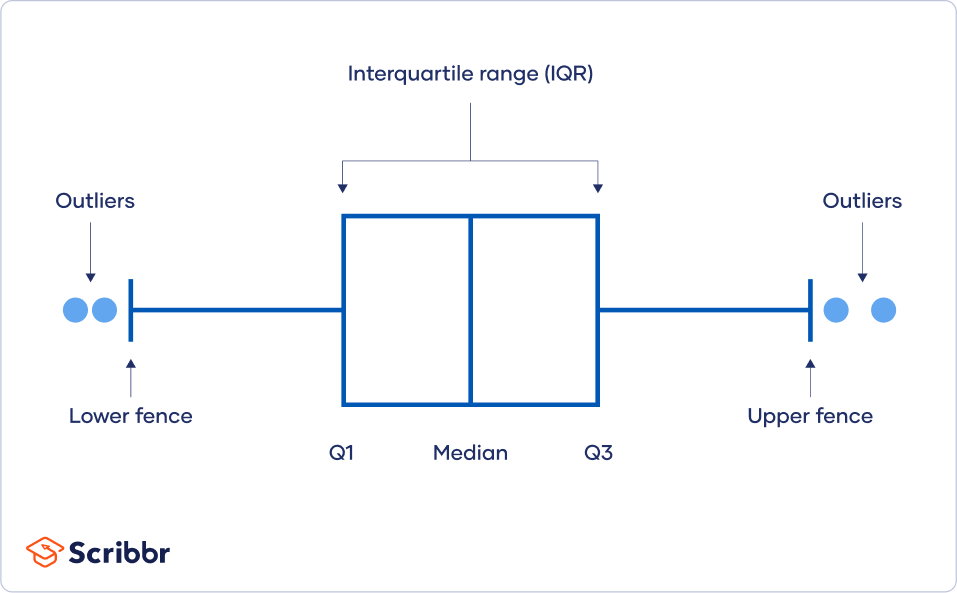

In [ ]:
for col in data.columns:

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower) & (data[col] <= upper)]


### 3. Dividir en entrenamiento y prueba

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

display(train.head())
display(test.head())

¿Cuál es la diferencia entre train y test?

In [ ]:
print(f"Train tiene {len(train)} filas y test tiene {len(test)} filas")

Antes de pasar al entrenamiento, debemos completar un último paso, separar nuestra variable objetivo de nuestras variables predictoras

In [ ]:
X_train = train.drop(columns=["MedHouseVal"])
y_train = train["MedHouseVal"]

X_test = test.drop(columns=["MedHouseVal"])
y_test = test["MedHouseVal"]

### 4. Entrenar el modelo
Vale, ahora tenemos nuestros datos limpios, procesados, y separados en entrenamiento y prueba.
Tenemos todo preparado para entrenar nuestro modelo, pero, ¿qué modelo debemos elegir?

Esta es la gran pregunta, y la respuesta depende de varios factores, según los cuales unos modelos u otros serán más adecuados:
- Tipo de variables predictoras
- Complejidad del modelo
- Relaciones entre las variables

Todos los modelos tienen características distintas, y se ajustan mejor a ciertos tipos de datos.
En nuestro caso TODAS nuestras variables son _______ y queremos elegir un modelo relativamente sencillo.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train);

### 5. Evaluar el modelo
¿Cómo podemos saber si las predicciones de nuestro modelo son buenas?

Para ello existen una serie de métricas que se calculan comparando los valores reales (y_test) con los valores que nuestro modelo ha predicho (y_pred) para los datos de prueba.
La más común es el MSE(Mean Squared Error) o Error Cuadrático Medio


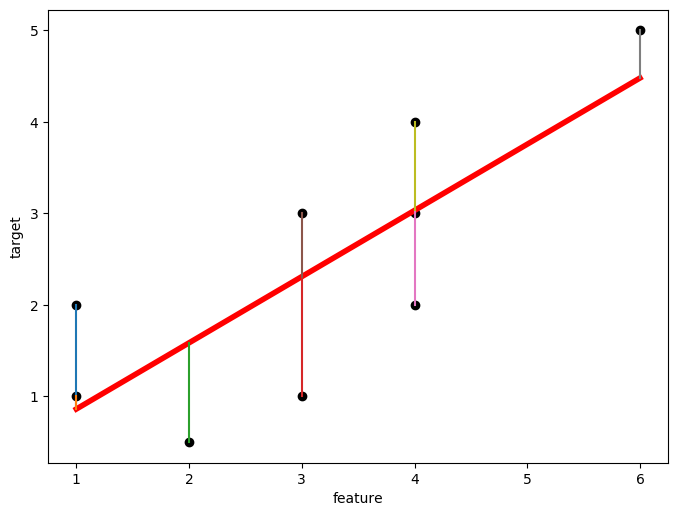


In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("=== Evaluación en Entrenamiento ===")
print("MSE:", mean_squared_error(y_train, y_pred_train))

print("\n=== Evaluación en Prueba ===")
print("MSE:", mean_squared_error(y_test, y_pred_test))

También podemos usar matplotlib para ver nuestros resultados de manera más visual

In [ ]:
subset = X_test.copy()
subset['y_real'] = y_test
subset['y_pred'] = model.predict(X_test)
subset_20 = subset.sample(n=20, random_state=42)

index = range(len(subset_20))

plt.figure(figsize=(12,6))

plt.scatter(index, subset_20['y_real'], color='red', label='Valor Real', s=100)
plt.scatter(index, subset_20['y_pred'], color='blue', label='Predicción', s=100, marker='x')

plt.xticks(index, subset_20.index, rotation=45)
plt.ylabel('Target')
plt.title('Comparación de Valores Reales y Predicciones (20 observaciones)')
plt.legend()
plt.tight_layout()
plt.show()

## Problema 2: Consumo combustible vehículos
Para el segundo problema vamos a hacer algo parecido, solo que con una base de datos muy distinta. Esto nos enseñará que hay que conocer bien los datos para poder adaptar todos los pasos del problema. Ahora vamos a trabajar con variables distintas, de distintos tipos, y compararemos modelos distintos para elegir el mejor.
Estas son las variables con las que vamos a trabajar:
- **mpg**: consumo de combustible en millas por galón (variable objetivo)
- **cylinders**: número de cilindros del motor
- **displacement**: tamaño del motor
- **horsepower**: potencia del motor
- **weight**: peso del vehículo
- **acceleration**: tiempo que tarda en acelerar de 0 a 60 mph
- **model_year**: año del modelo del coche
- **origin**: región de fabricación
- **name**: nombre del coche (marca y modelo)

### 1. Importar los datos

In [ ]:
mpg = sns.load_dataset("mpg")

In [ ]:
# Completa: ver las primeras 5 filas de la tabla de datos

¿Cuántas observaciones tenemos?

In [ ]:
print(f"Tenemos un total de {len(mpg)} coches")

### 2. Procesar los datos

In [ ]:
mpg.describe()

Al contrario que en el primer problema, en este tenemos variables que debemos tratar individualmente

In [ ]:
print(f"Hay un total de {len(mpg['name'].unique())} nombres distintos")

In [ ]:
# Completa: elimina la columna 'name'

Además, la variable 'origin' no es numérica, por lo tanto nuestros modelos no podrán entrenarse con ella.
Debemos cambiarla de formato, ya que si la eliminamos perderemos información valiosa.
La convertiremos en una **dummy variable**.

In [ ]:
print(mpg['origin'].unique())

In [ ]:
mpg = pd.get_dummies(mpg, columns=['origin'], drop_first=True)
mpg.head()

Valores ausentes

In [ ]:
mpg.isna().sum()

Sustituimos por la media

In [ ]:
# Completa: calcula la media de los caballos
average_horsepower = ''
mpg.loc[mpg['horsepower'].isna(), 'horsepower'] = average_horsepower

Valores atípicos/extremos

In [ ]:
numeric_columns = mpg.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:

    Q1 = mpg[col].quantile(0.25)
    Q3 = mpg[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    total_outliers = len(mpg[(mpg[col] < lower) | (mpg[col] > upper)])

    print(f"La columna {col} tiene {total_outliers} outliers")
    mpg = mpg[(mpg[col] >= lower) & (mpg[col] <= upper)]


### 3. Dividir en entrenamiento y prueba

In [ ]:
train, test = train_test_split(mpg, test_size=0.2, random_state=42)

display(train.head())
display(test.head())

In [ ]:
print(f"Train tiene {len(train)} filas y test tiene {len(test)} filas")

In [ ]:
X_train = train.drop(columns=["mpg"])
y_train = train["mpg"]

X_test = test.drop(columns=["mpg"])
y_test = test["mpg"]

### 4. Entrenar los modelos
Para este segundo problema vamos a entrenar dos modelos distintos, para después comparar sus resultados y elegir el mejor modelo de regresión.

Modelo 1: RandomForest

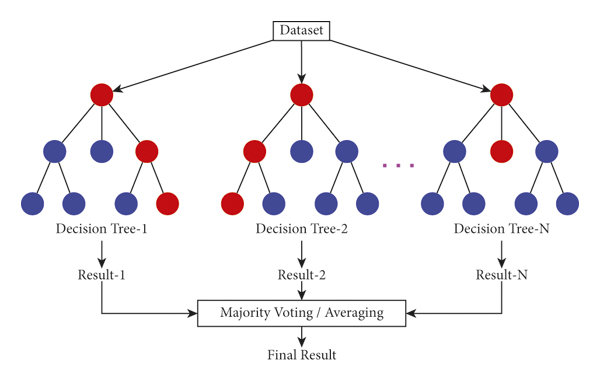

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train);

Modelo 2: Support Vector Machine

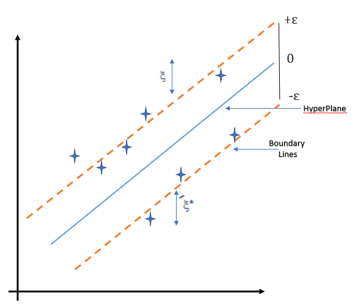

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf')
# Completa los argumentos para entrenar tu modelo
svr.fit();

### 5. Evaluar los modelos

In [ ]:
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")

In [ ]:
y_pred_svr = svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR - Mean Squared Error: {mse_svr:.2f}")